In [13]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# need for file enumeration and getting file path
import os 
from os import listdir
from os.path import isfile, join

# reloads module to update
import universal_methods
import importlib
importlib.reload(universal_methods)
# .py file with universal methods, that I use more than one time in this project
from universal_methods import Universal
# library to work with image meta data
from PIL.ExifTags import TAGS
from PIL import ExifTags
from PIL import Image


# For reproducibility
np.random.seed(42)

---
##### Data Acquisition

In [2]:
X,y=Universal().get_images()

Found 2041 images belonging to 2 classes.


 ____

##### Check for shapes 

In [3]:
X.shape,y.shape

((2041, 600, 600, 3), (2041,))

Plot image examples that belongs to true class.

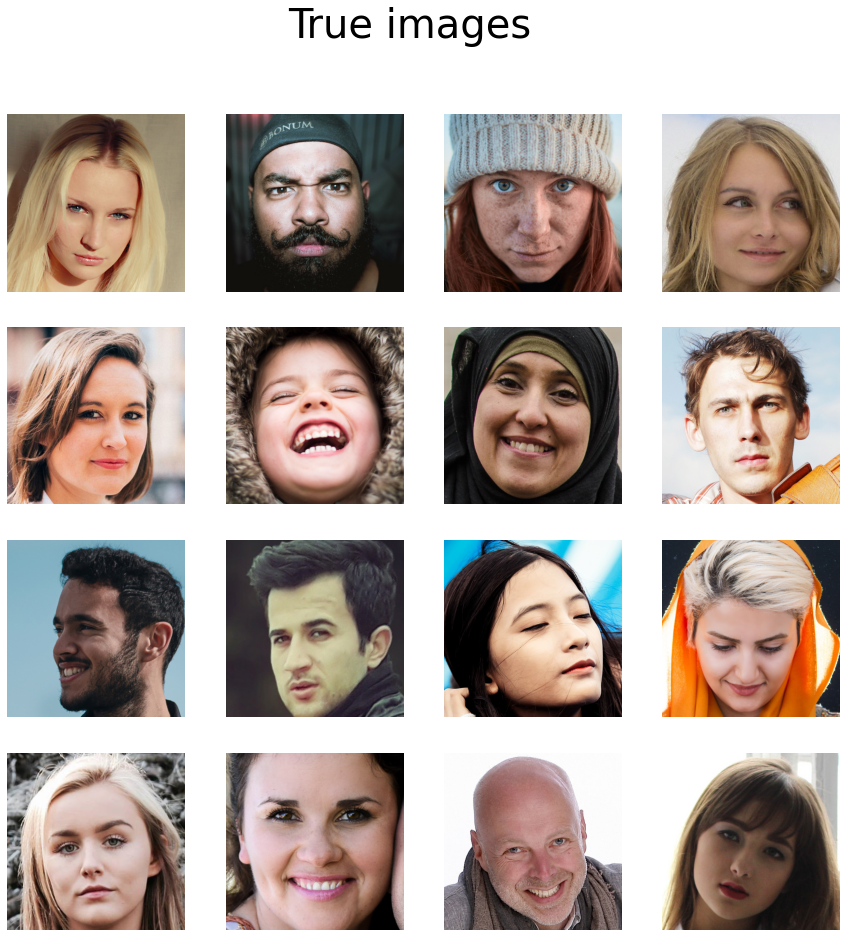

In [4]:
true_faces=Universal().get_class(X,y,1)
Universal().plot_samples(true_faces,16,4,"True");

Plot image examples that belongs to fake class.

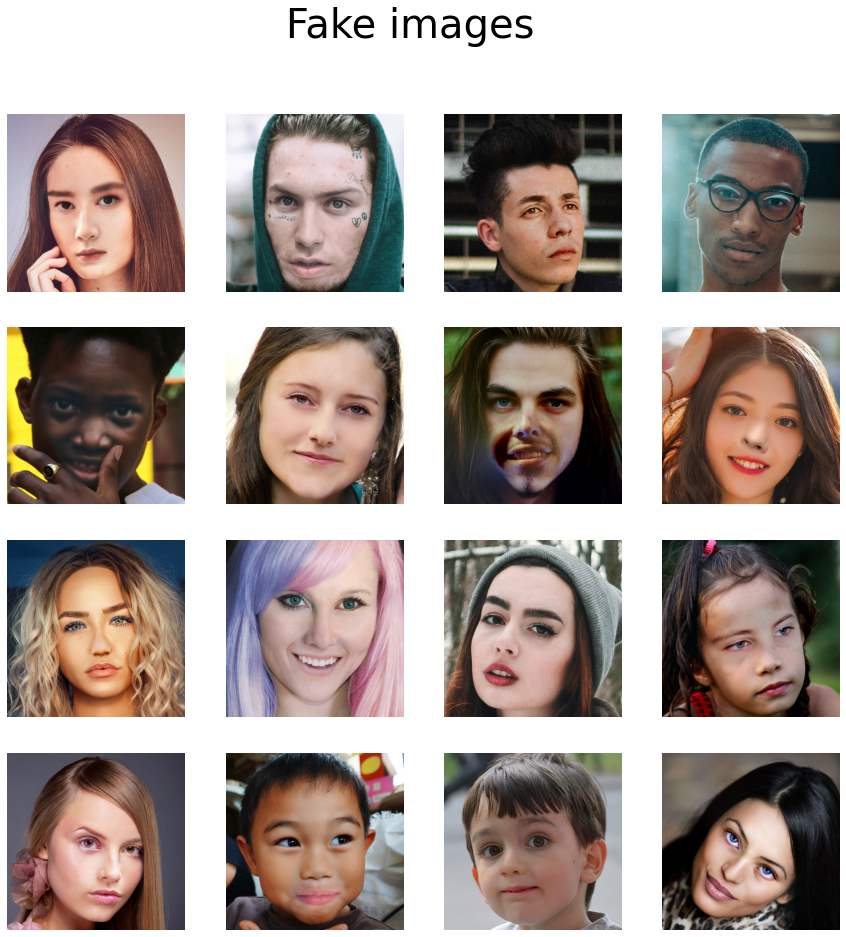

In [5]:
fake_faces=Universal().get_class(X,y,0)
Universal().plot_samples(fake_faces,16,4,"Fake");


Baseline accuracy 

In [6]:
y.mean()

0.52964234

Baseline accuracy plot

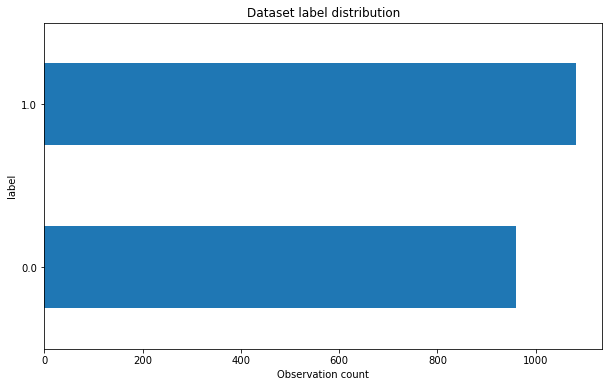

In [7]:
class_labels = ['fake_image','true_image']
plt.figure(figsize = (10, 6))
plt.title('Dataset label distribution')
plt.xlabel('Observation count')
labels = pd.DataFrame(y, columns = ['label'])
class_groups = labels.groupby('label')['label'].count()
class_groups.plot.barh(x="speed");

----
##### Metadata check
Before trying complicated data augumentations, let's try simple deductive approach and check metadata of the images. It often contains signs of alterations, software name etc.

In [8]:

mypath_fake="../data/real_and_fake_face/training_fake/"
mypath_real="../data/real_and_fake_face/training_real/"
fake = [mypath_fake+f for f in listdir(mypath_fake) if isfile(join(mypath_fake, f))]
real = [mypath_real+f for f in listdir(mypath_real) if isfile(join(mypath_real, f))]



Quick method to check if there is any metadata.

In [11]:
def check_meta(file_list):
    for image_path in file_list:
        image = Image.open(image_path)  
        img_exif = image.getexif()
        result={}
        # iterating over all EXIF data fields
        if len(img_exif.keys())==0:
            continue
        else:
            for key, val in img_exif.items():
                if key in ExifTags.TAGS:
                    result[key]=val
    if len(result)==0:
        print("No Metadata was found")
    else:
        print(f"Found {len(result)} lines")
        return result

    

In [14]:
check_meta(fake)

No Metadata was found


In [1]:
check_meta(real)

NameError: name 'check_meta' is not defined

Nothing was found, but it was worth trying.
